---
>> **1. UŽDUOTIS**
>>
>> kalba.csv faile mikrofonu užfiksuota žmogaus kalba.
>>
>> - Importuokite ir sutvarkykite duomenis.
>> - Aprašykite matomą signalą (Kada prasideda ir baigiasi, kokie dažniai vyrauja)
>> - Kaip skirtingi duomenų atstatymo metodai (interpoliacijos variantai iš rudens semestro) įtakoja užfiksuotą kalbos signalą, jo spektrines savybes?
>>
>>
>> Duomenys: kalba.csv, diskretizacijos dažnis nurodytas pirmose eilutėse.
>>

---

In [9]:
# 1 task
#
# kalba.csv file contains a microphone recording of human speech
#
# 1. Import and organise the data
# 2. Describe the signal you see (when it starts and stops, what frequencies are dominant)
# 3. How do the different methods of data reconstruction (interpolation variants) 
#    affect the recorded speech signal and its spectral properties?

In [ ]:
# Importuoju reikiamus paketus

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob
import csv
import stockwell as smt
import re
import math
import random
import scipy.signal as signal
idx = pd.IndexSlice
from scipy.fftpack import fft, fftshift
import seaborn as sns

In [159]:
sample_rate = 7418 # Priskiriu diskretizacijos dažnio vertę
data = pd.read_csv("kalba.csv", skiprows = 3) # Nuskaitau kalba.csv failą nuo 3 eilutės
data.columns = ["Signalas"] # Priskiriu stulpelio pavadinimą
data.head()

duomenys = data["Signalas"].str.strip("#, V") # Iš duomenų lentelės pašalinu nereikalingus simbolius
duomenys.head()

duomenys = pd.to_numeric(duomenys) # Paverčiu duomenų lentelės vertes į skaičių pavidalą

type(duomenys.iloc[0]) # Patikrinu ar pirmos lentelės vertės tipą

isvalyta_data = duomenys.replace(-100, np.nan) # Pakeičiu lentelėje esančias -100 vertes į NaN
isvalyta_data.isna().sum() # Patikrinu kiek yra NaN verčių

Text(0, 0.5, 'Amplitudė (V)')

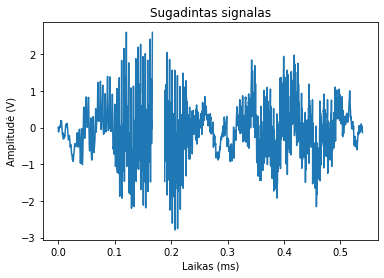

In [160]:
#  Nubrėžiu grafiką, kurio x ašis yra laikas (gaunamas matavimų skaičių padalinus iš diskretizacijos dažnio), o y ašis 
#  nurodo amplitudę. Priskiriu ašių bei grafiko pavadinimus.

plt.plot(np.arange(len(isvalyta_data))/ sample_rate, isvalyta_data)
plt.title("Sugadintas signalas")
plt.xlabel("Laikas (ms)")
plt.ylabel("Amplitudė (V)")

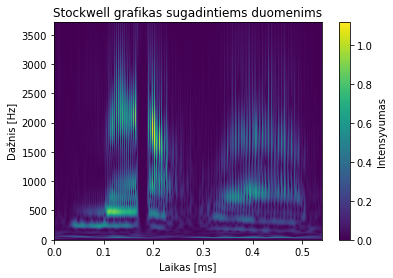

In [174]:
isvalyta_data_stockwellui = duomenys.replace(-100, 0)
sample_rate = 7418 # Priskiriu diskretizacijos dažnio vertę

# Sukuriu laiko masyvą, kuris prasideda nuo 0, baigiasi ties matavimų skaičiaus padalinto iš diskretizacijos dažnio vertės.

t = np.linspace(
    0,
    len(isvalyta_data_stockwellui) / sample_rate,
    len(isvalyta_data_stockwellui)
)

# Duomenų lentelei naudoju smt.st.st funkciją, pertvarkau duomenų lentelę
# Nubrėžiu Stockwell grafiką sugadintiems duomenims
s_transfrm = smt.st.st(np.array(isvalyta_data_stockwellui).reshape(4000))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(s_transfrm)[0]),
    np.abs(s_transfrm),
    cmap="viridis",
    shading='nearest'
);
plt.colorbar(label = "Intensyvumas")
plt.xlabel("Laikas [ms]")
plt.ylabel("Dažnis [Hz]")
plt.title("Stockwell grafikas sugadintiems duomenims")
plt.show()

Text(0, 0.5, 'Amplitudė (V)')

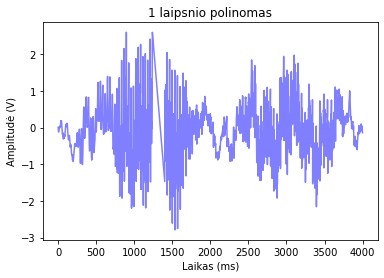

In [180]:
# Interpoliuoju duomenis pirmo laipsnio polinomu
polinomas = df.interpolate(method="polynomial", order=1)
interpoliacija = isvalyta_data.interpolate(method="polynomial", order=1).plot(
    alpha=0.5, color="blue", title="1 laipsnio polinomas"
)
plt.xlabel("Laikas (ms)")
plt.ylabel("Amplitudė (V)")

Text(0, 0.5, 'Amplitudė (V)')

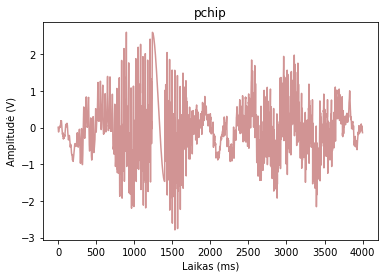

In [163]:
# Interpoliuoju duomenis pchip metodu

isvalyta_data.interpolate(method="pchip").plot(
    alpha=0.5, color="brown", title="pchip"
)
plt.xlabel("Laikas (ms)")
plt.ylabel("Amplitudė (V)")

Text(0, 0.5, 'Amplitudė (V)')

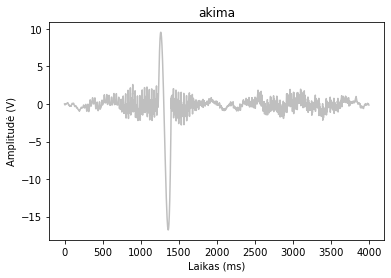

In [164]:
# Interpoliuoju duomenis akima metodu

isvalyta_data.interpolate(method="akima").plot(
    alpha=0.5, color="grey", title="akima"
)
plt.xlabel("Laikas (ms)")
plt.ylabel("Amplitudė (V)")

Text(0, 0.5, 'Amplitudė (V)')

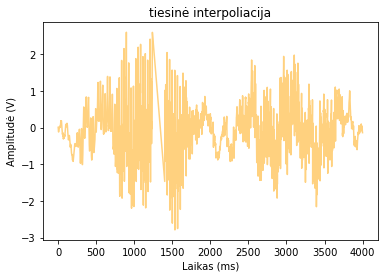

In [176]:
# Interpoliuoju duomenis tiesiniu metodu
tiesinis = df.interpolate(method = "linear")
isvalyta_data.interpolate(method="linear").plot(
    alpha=0.5, color="orange", title="tiesinė interpoliacija"
)
plt.xlabel("Laikas (ms)")
plt.ylabel("Amplitudė (V)")

Text(0.5, 1.0, 'Interpoliacija artimiausiais nariais')

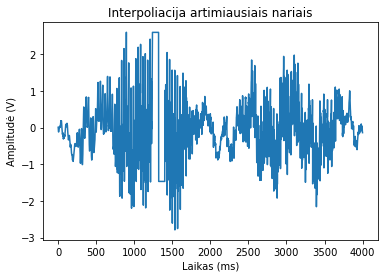

In [171]:
# Interpoliuoju duomenis artimiausiais nariais
df = pd.DataFrame(isvalyta_data)
interpoliuotas = df.interpolate(method = "nearest")
plt.plot(interpoliuotas)
plt.xlabel("Laikas (ms)")
plt.ylabel("Amplitudė (V)")
plt.title("Interpoliacija artimiausiais nariais")

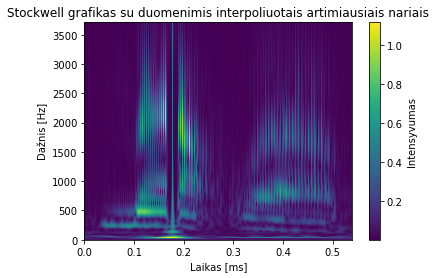

In [178]:
# Nubrėžiu Stockwell grafiką su duomenimis interpoliuotais artimiausiais nariais

interpoliuotas_array = np.array(interpoliuotas).reshape(4000)
interpoliuotas_st = smt.st.st(interpoliuotas_array)
sample_rate = 7418
t = np.linspace(
    0,
    len(interpoliuotas) / sample_rate,
    len(interpoliuotas)
)
plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(interpoliuotas_st)[0]),
    np.abs(interpoliuotas_st),
    cmap="viridis",
    shading='nearest'
);
plt.colorbar(label = "Intensyvumas")
plt.xlabel("Laikas [ms]")
plt.ylabel("Dažnis [Hz]")
plt.title("Stockwell grafikas su duomenimis interpoliuotais artimiausiais nariais")
plt.show()

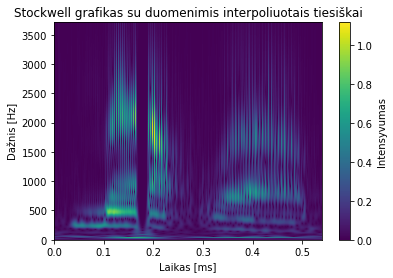

In [179]:
# Nubrėžiu Stockwell grafiką su duomenimis interpoliuotais tiesiškai

tiesinis_array = np.array(tiesinis).reshape(4000)
tiesinis_st = smt.st.st(tiesinis_array)
sample_rate = 7418
t = np.linspace(
    0,
    len(tiesinis) / sample_rate,
    len(tiesinis)
)
plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(tiesinis_st)[0]),
    np.abs(tiesinis_st),
    cmap="viridis",
    shading='nearest'
);
plt.colorbar(label = "Intensyvumas")
plt.xlabel("Laikas [ms]")
plt.ylabel("Dažnis [Hz]")
plt.title("Stockwell grafikas su duomenimis interpoliuotais tiesiškai")
plt.show()

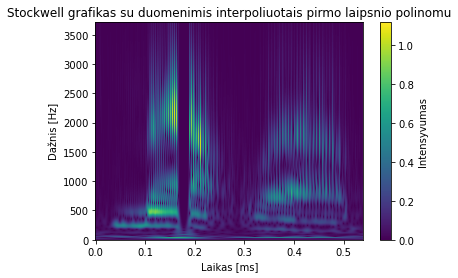

In [182]:
# Nubrėžiu Stockwell grafiką su duomenimis interpoliuotais pirmo laipsnio polinomu

polinomas_array = np.array(polinomas).reshape(4000)
polinomas_st = smt.st.st(polinomas_array)
sample_rate = 7418
t = np.linspace(
    0,
    len(polinomas) / sample_rate,
    len(polinomas)
)
plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(polinomas_st)[0]),
    np.abs(polinomas_st),
    cmap="viridis",
    shading='nearest'
);
plt.colorbar(label = "Intensyvumas")
plt.xlabel("Laikas [ms]")
plt.ylabel("Dažnis [Hz]")
plt.title("Stockwell grafikas su duomenimis interpoliuotais pirmo laipsnio polinomu")
plt.show()

In [257]:
# REZULTATAI: buvo importuoti ir sutvarkyti duomenys, iš Stockwell grafikų galima pastebėti, kad signalas prasideda maždaug ties 0.1 ms
# ir baigiasi ties 0.5 ms, nuo maždaug 0.24 ms iki 0.31 ms signalo aktyvumas labai silpnas, galima spėti, kad tuo metu yra tyla tarp
# sakomų skiemenų "mat" ir "lab". Vyraujantys dažniai - 500 Hz ir nuo 1700 iki 2500 Hz. Ryškiai matomas signalo sugadinimas, grafikuose
# ties 0.18 ms nėra pavaizduoto intensyvumo. Skirtingi duomenų atstatymo metodai nedaug įtakoja užfiksuotą kalbos signalą, vienintelė
# interpoliaciją su artimiausiasis nariais darė vizualiai iš grafiko pastebimą įtaką - vietoje kur intensyvumo nebuvo atsirado spyglys.

---
>> **2. UŽDUOTIS**
>>
>>
>> ![powerbands](./powerBandsEEG.jpeg)
>>
>> Užfiksuotos 10 žmonių elektroencefalogramos jiems būnant atsimerkus ir užsimerkus.
>> - Importuokite duomenis
>> - Suskaičiuokite vidutinę galią kiekviename įraše intervaluose:
>>   - delta 1-4 Hz
>>   - theta 4-8 Hz
>>   - alpha 8-12 Hz
>>   - beta  12-40 Hz
>>   - gamma 40-100 Hz
>> - Palyginkite atmerktų (EO) ir užmerktų (EC) akių sąlygas
>>
>> Duomenys: EO_x.csv ir EC_x.csv failuose. Pirmas stulpelis voltai, antras stulpelis laikas milisekundėmis, diskretizacijos dažnis 2048
>>

---

In [10]:
# 2 task
#
# Electroencephalograms of 10 people were recorded when their eyes were open and when they were closed
#
# 1. Import the data
# 2. Calculate the average power in each recording over the intervals: delta 1-4 Hz; theta 4-8 Hz; alpha 8-12 Hz; 
#    beta 12-40 Hz; gamma 40-100 Hz
# 3. Compare the conditions of eyes open (EO) and eyes closed (EC)

In [200]:
# Nurodau diskretizacijos dažnį ir įsikeliu užmerktų akių .csv failus, stulpeliams suteikiu pavadinimą.
sample_rate = 2048
data1 = pd.read_csv("EC_01.csv", names = ["potencialas_1", "Laikas"])
data2 = pd.read_csv("EC_02.csv", names = ["potencialas_2", "Laikas"])
data3 = pd.read_csv("EC_03.csv", names = ["potencialas_3", "Laikas"])
data4 = pd.read_csv("EC_04.csv", names = ["potencialas_4", "Laikas"])
data5 = pd.read_csv("EC_05.csv", names = ["potencialas_5", "Laikas"])
data6 = pd.read_csv("EC_06.csv", names = ["potencialas_6", "Laikas"])
data7 = pd.read_csv("EC_07.csv", names = ["potencialas_7", "Laikas"])
data8 = pd.read_csv("EC_08.csv", names = ["potencialas_8", "Laikas"])
data9 = pd.read_csv("EC_09.csv", names = ["potencialas_9", "Laikas"])
data10 = pd.read_csv("EC_10.csv", names = ["potencialas_10", "Laikas"])

# Sujungiu visų EC_x failų potencialo stulpelius

EC_visi = pd.concat([data1.potencialas_1, data2.potencialas_2, data3.potencialas_3, data4.potencialas_4, data5.potencialas_5,
                     data6.potencialas_6, data7.potencialas_7, data8.potencialas_8, data9.potencialas_9, data10.potencialas_10], axis = 1)

In [204]:
# Suvidurkinu EC_x failų stulpelius

vidurkis = EC_visi.mean(axis = 1)
print(vidurkis)

# Sukuriu EC_x failų potencialo stulpelių sarašą

EC_V_stulpeliai = [data1["potencialas_1"], data2["potencialas_2"], data3["potencialas_3"], data4["potencialas_4"], data5["potencialas_5"],
                   data6["potencialas_6"], data7["potencialas_7"], data8["potencialas_8"], data9["potencialas_9"],data10["potencialas_10"]]

# Sukuriu tuščią sarašą

EC_vidurkiai = []

# Naudoju Welcho metodą galios spektrinio tankio įvertinimui. Kiekvienam x iš EC_V_stulpeliai masyvo:

for x in EC_V_stulpeliai:
    f, Pxx_spec = signal.welch(x, sample_rate, 'hann', 2048, scaling='density')
    
# Traukiu kvadratinčę šaknį iš absoliučių matavimo verčių laiko eilučių, kad galėčiau gauti galios spektrą

amp_saknis = np.sqrt(np.abs(Pxx_spec))

# Išrenku delta, theta, alpha, beta, gamma intervalus iš dažnio skalės

vid_delta = amp_saknis[0:4]
vid_theta = amp_saknis[3:8]
vid_alpha = amp_saknis[7:12]
vid_beta = amp_saknis[11:40]
vid_gamma = amp_saknis[39:100]

# Gaunu vidutinę galią kieviename skirtingo tipo bangos intervale

vid_galia_delta = (vid_delta.sum())/len(vid_delta)
vid_galia_theta = (vid_theta.sum())/len(vid_theta)
vid_galia_alpha = (vid_alpha.sum())/len(vid_alpha) 
vid_galia_beta = (vid_beta.sum())/len(vid_beta)
vid_galia_gamma = (vid_gamma.sum())/len(vid_gamma)

# Sukuriu suvidurkintų galių masyvą ir pridedu jį prie tuščio sąrašo

suvidurkintos_galios = [vid_galia_delta, vid_galia_theta, vid_galia_alpha, vid_galia_beta , vid_galia_gamma]
EC_vidurkiai.append(suvidurkintos_galios)

# Sukuriu duomenų lentelę iš galių vidurkių sarašo, prisikiriu stulpeliams pavadinimus

df_vidurkintu_verciu = pd.DataFrame(EC_vidurkiai)
df_vidurkintu_verciu.columns = ["delta", "theta", "alpha", "beta", "gamma"]
print(df_vidurkintu_verciu)

0        -0.910087
1        -0.611802
2        -0.337556
3        -0.099804
4         0.091344
            ...   
648197    5.851600
648198    5.533700
648199    5.096300
648200    4.550400
648201    3.914100
Length: 648202, dtype: float64
      delta     theta     alpha      beta     gamma
0  1.951989  1.809735  1.608712  0.624511  0.150261


In [205]:
# Analogiškai viską atlieku su atmerktų akių duomenimis

sample_rate = 2048
data11 = pd.read_csv("EO_01.csv", names = ["potencialas_11", "Laikas"])
data22 = pd.read_csv("EO_02.csv", names = ["potencialas_22", "Laikas"])
data33 = pd.read_csv("EO_03.csv", names = ["potencialas_33", "Laikas"])
data44 = pd.read_csv("EO_04.csv", names = ["potencialas_44", "Laikas"])
data55 = pd.read_csv("EO_05.csv", names = ["potencialas_55", "Laikas"])
data66 = pd.read_csv("EO_06.csv", names = ["potencialas_66", "Laikas"])
data77 = pd.read_csv("EO_07.csv", names = ["potencialas_77", "Laikas"])
data88 = pd.read_csv("EO_08.csv", names = ["potencialas_88", "Laikas"])
data99 = pd.read_csv("EO_09.csv", names = ["potencialas_99", "Laikas"])
data1010 = pd.read_csv("EO_10.csv", names = ["potencialas_1010", "Laikas"])

EO_visi = pd.concat([data11.potencialas_11, data22.potencialas_22, data33.potencialas_33, data44.potencialas_44, data55.potencialas_55, data66.potencialas_66, data77.potencialas_77, data88.potencialas_88, data99.potencialas_99, data1010.potencialas_1010], axis = 1)

vidurkis_eo = EO_visi.mean(axis = 1)
print(vidurkis_eo)

EO_V_stulpeliai = [data11["potencialas_11"], data22["potencialas_22"], data33["potencialas_33"], data44["potencialas_44"], data55["potencialas_55"], data66["potencialas_66"], data77["potencialas_77"], data88["potencialas_88"], data99["potencialas_99"], data1010["potencialas_1010"]]

EO_vidurkiai = []

# Naudoju Welcho metodą galios spektrinio tankio įvertinimui.
for x in EO_V_stulpeliai:
    f, Pxx_spec = signal.welch(x, sample_rate, 'hann', 2048, scaling='density')

amp_saknis_eo = np.sqrt(np.abs(Pxx_spec))
vid_delta_eo = amp_saknis_eo[0:4]
vid_theta_eo = amp_saknis_eo[3:8]
vid_alpha_eo = amp_saknis_eo[7:12]
vid_beta_eo = amp_saknis_eo[11:40]
vid_gamma_eo = amp_saknis_eo[39:100]

vid_galia_delta_eo = (vid_delta_eo.sum())/len(vid_delta_eo)
vid_galia_theta_eo = (vid_theta_eo.sum())/len(vid_theta_eo)
vid_galia_alpha_eo = (vid_alpha_eo.sum())/len(vid_alpha_eo) 
vid_galia_beta_eo = (vid_beta_eo.sum())/len(vid_beta_eo)
vid_galia_gamma_eo = (vid_gamma_eo.sum())/len(vid_gamma_eo)

suvidurkintos_galios_eo = [vid_galia_delta_eo, vid_galia_theta_eo, vid_galia_alpha_eo, vid_galia_beta_eo, vid_galia_gamma_eo]
EO_vidurkiai.append(suvidurkintos_galios_eo)

df_vidurkintu_verciu_eo = pd.DataFrame(EO_vidurkiai)
df_vidurkintu_verciu_eo.columns = ["delta", "theta", "alpha", "beta", "gamma"]
print(df_vidurkintu_verciu_eo)

0        -0.454641
1        -0.372449
2        -0.358895
3        -0.405692
4        -0.500956
            ...   
672888    1.016600
672889    1.798000
672890    2.477600
672891    3.046900
672892    3.503900
Length: 672893, dtype: float64
      delta     theta    alpha      beta     gamma
0  1.669493  1.486227  1.45044  0.581575  0.188675


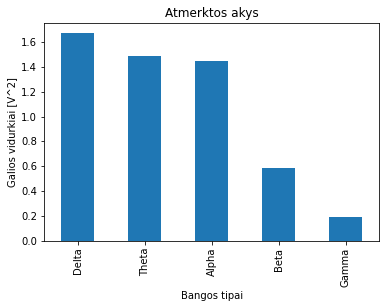

In [206]:
# Sukuriu duomenų lentelę su galios vidurkiais bei bangos tipais, pasirenku pirmą df eilutę ir nubrėžiu stulpelinę diagramą
# su atmerktų akių duomenimis

d = {'columns': ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'],
     'data': [[1.669493, 1.486227, 1.45044, 0.581575, 0.188675]],
     'index': [1]}
df = pd.DataFrame(d['data'], columns=d['columns'], index=d['index'])
row = df.iloc[0]
row.plot(kind='bar')
plt.title('Atmerktos akys') 
plt.xlabel('Bangos tipai') 
plt.ylabel('Galios vidurkiai [V^2]') 
plt.show()

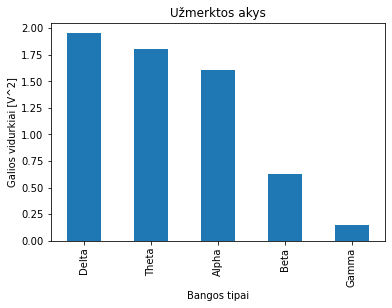

In [207]:
# Anlogiškai, sukuriu duomenų lentelę su galios vidurkiais bei bangos tipais, pasirenku pirmą df eilutę ir nubrėžiu stulpelinę diagramą
# su užmerktų akių duomenimis

d = {'columns': ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'],
     'data': [[ 1.951989, 1.809735, 1.608712, 0.624511, 0.150261]],
     'index': [1]}
df = pd.DataFrame(d['data'], columns=d['columns'], index=d['index'])
row = df.iloc[0]
row.plot(kind='bar')
plt.title('Užmerktos akys') 
plt.xlabel('Bangos tipai') 
plt.ylabel('Galios vidurkiai [V^2]') 
plt.show()

In [300]:
# REZULTATAI: buvo suskaičiuotos vidutinės galios įrašų intervaluose (delta, theta, alpha, beta, gamma). Iš grafikų sunku pastebėti 
# stiprius skirtumus tarp atmerktų ir užmerktų akių sąlygų, bet galima išskirti tai, kad esant užmerktom akim signalo galios vidurkis
# ties delta bangos intervalu yra didesnis nei esant atmerktom akim. Taip pat signalo galios vidurkis esant užmerktom akim yra šiek tiek
# didesnis ties theta ir alpha intervalais nei esant atmerktom akim. Pagal teoriją tokie rezultatai galėtų būti teisingi, nes delta
# theta ir alpha bangų dažniai fiksuojami ramybės būsenoje, pavyzdžiui, kai žmogus yra užsimerkęs ir atsipalaidavęs. Tiesa, beta ir 
# gamma bangų dažniai turėtų būti fiksuojami žmogui būnant atsimerku ir esant budriam, galios vidurkiai turėtų būti didesni palyginus
# su užmerktų akių sąlygomis, bet to duomenys neparodė.

---
>> **3. UŽDUOTIS**
>>
>> Duomenyse pateikti seismografo užfiksuoti žemės drebėjimų ir sprogimų signalai.
>>
>> Įrašus importuokite, vizualizuokite ir aprašykite:
>>
>> - įvykių pradžios ir pabaigos laikus.
>> - vyraujančius dažnius
>> - palyginkite žemės drebėjimus ir sprogimus
>>
>> Duomenys: SprogimaiIrDrebejimai.csv sudarytas iš 16 stulpelių/įrašų. Pirmi 8 stulpeliai yra žemės drebėjimų įrašai. Likusiuose 8 stulpeliuose - sprogimų įrašai. Diskretizacijos dažnis = 2048 Hz
>>

---

In [11]:
# 3 task
#
# The data includes earthquake and explosion signals recorded by a seismograph
#
# 1. Import, visualise and describe the recordings: start and end times of events, the prevailing frequencies
# 2. Compare earthquakes and explosions

In [268]:
# Priskiriu diskretizacijos dažnio vertę, nuskaitau duomenis bei sukuriu duomenų lentelę

sample_rate = 2048
sprog_dreb = pd.read_csv("SprogimaiIrDrebejimai.csv", header = None)
sprog_dreb.head()
df_sprog_dreb = pd.DataFrame(sprog_dreb)

Text(0, 0.5, 'Amplitudė (V)')

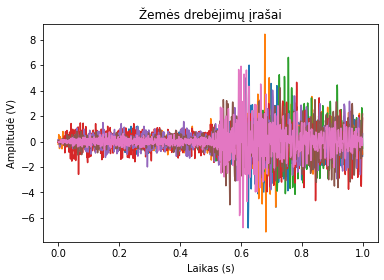

In [285]:
# Nubrėžiu grafiką pagal pirmų 8 stulpelių duomenis. Laiko skalę gaunu padalindamas duomenų fiksavimo skaičių iš
# diskretizacijos dažnio

plt.plot(np.arange(len(sprog_dreb))/ sample_rate, sprog_dreb.iloc[:,:7])
plt.title("Žemės drebėjimų įrašai")
plt.xlabel("Laikas (s)")
plt.ylabel("Amplitudė (V)")

Text(0, 0.5, 'Amplitudė (V)')

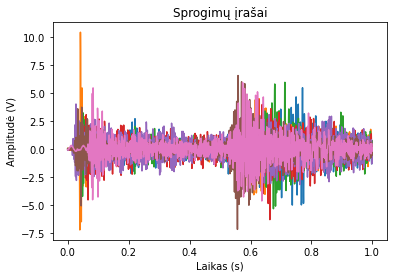

In [284]:
# Analogiškai nubrėžiu grafiką pagal likusių 8 stulpelių duomenis. Gaunu sprogimo įrašo grafiką. Grafikai padeda geriau suvokti
# suvokti su kokiais duomenimis dirbu

plt.plot(np.arange(len(sprog_dreb))/ sample_rate, sprog_dreb.iloc[:,8:15])
plt.title("Sprogimų įrašai")
plt.xlabel("Laikas (s)")
plt.ylabel("Amplitudė (V)")

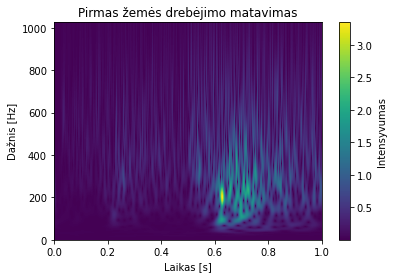

In [283]:
# Sukuriu laiko masyvą, kuris prasideda nuo 0 ir baigiasi ties signalo pabaiga.


t = np.linspace(
    0,
    len(df_sprog_dreb) / sample_rate,
    len(df_sprog_dreb)
)

# Brėžiu Stockwell grafiką pirmam žemės drebėjimo matavimui. Pasižiūriu kaip atrodo vieno stebėjimo TF grafikas.

sprog_dreb_transf_0 = smt.st.st(np.array(df_sprog_dreb[0]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_0)[0]),
    np.abs(sprog_dreb_transf_0),
    cmap="viridis",
    shading='nearest'
);
plt.colorbar(label = "Intensyvumas")
plt.xlabel("Laikas [s]")
plt.ylabel("Dažnis [Hz]")
plt.title("Pirmas žemės drebėjimo matavimas")
plt.show()

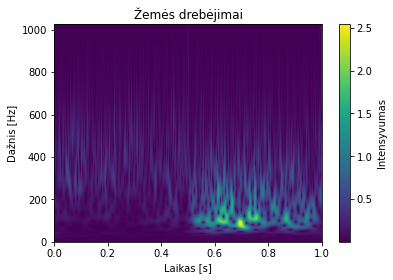

In [282]:
# Brėžiu Stockwell grafiką visiems žemės drebėjimo matavimams. Galiu vizualiai nusatyti kada prasidėjo ir baigėsi įvykis.

t = np.linspace(
    0,
    len(df_sprog_dreb) / sample_rate,
    len(df_sprog_dreb)
)
sprog_dreb_transf_0 = smt.st.st(np.array(df_sprog_dreb[0]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_0)[0]),
    np.abs(sprog_dreb_transf_0),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_1 = smt.st.st(np.array(df_sprog_dreb[1]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_1)[0]),
    np.abs(sprog_dreb_transf_1),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_2 = smt.st.st(np.array(df_sprog_dreb[2]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_2)[0]),
    np.abs(sprog_dreb_transf_2),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_3 = smt.st.st(np.array(df_sprog_dreb[3]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_3)[0]),
    np.abs(sprog_dreb_transf_3),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_4 = smt.st.st(np.array(df_sprog_dreb[4]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_4)[0]),
    np.abs(sprog_dreb_transf_4),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_5 = smt.st.st(np.array(df_sprog_dreb[5]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_5)[0]),
    np.abs(sprog_dreb_transf_5),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_6 = smt.st.st(np.array(df_sprog_dreb[6]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_6)[0]),
    np.abs(sprog_dreb_transf_6),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_7 = smt.st.st(np.array(df_sprog_dreb[7]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_7)[0]),
    np.abs(sprog_dreb_transf_7),
    cmap="viridis",
    shading='nearest'
);
plt.colorbar(label = "Intensyvumas")
plt.xlabel("Laikas [s]")
plt.ylabel("Dažnis [Hz]")
plt.title("Žemės drebėjimai")
plt.show()

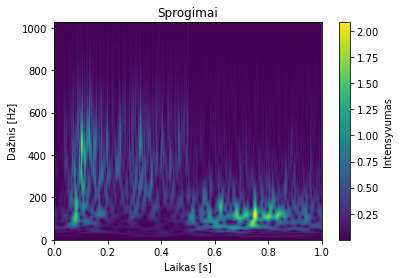

In [281]:
# Brėžiu Stockwell grafiką visiems sprogimų matavimams. Galiu vizualiai nusatyti kada prasidėjo ir baigėsi įvykis.

t = np.linspace(
    0,
    len(df_sprog_dreb) / sample_rate,
    len(df_sprog_dreb)
)
sprog_dreb_transf_8 = smt.st.st(np.array(df_sprog_dreb[8]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_8)[0]),
    np.abs(sprog_dreb_transf_8),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_9 = smt.st.st(np.array(df_sprog_dreb[9]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_9)[0]),
    np.abs(sprog_dreb_transf_9),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_10 = smt.st.st(np.array(df_sprog_dreb[10]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_10)[0]),
    np.abs(sprog_dreb_transf_10),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_11 = smt.st.st(np.array(df_sprog_dreb[11]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_11)[0]),
    np.abs(sprog_dreb_transf_11),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_12 = smt.st.st(np.array(df_sprog_dreb[12]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_12)[0]),
    np.abs(sprog_dreb_transf_12),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_13 = smt.st.st(np.array(df_sprog_dreb[13]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_13)[0]),
    np.abs(sprog_dreb_transf_13),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_14 = smt.st.st(np.array(df_sprog_dreb[14]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_14)[0]),
    np.abs(sprog_dreb_transf_14),
    cmap="viridis",
    shading='nearest'
);
sprog_dreb_transf_15 = smt.st.st(np.array(df_sprog_dreb[15]).reshape(2048))

plt.pcolormesh(
    t,
    np.linspace(0, sample_rate/ 2 + 1,np.shape(sprog_dreb_transf_15)[0]),
    np.abs(sprog_dreb_transf_15),
    cmap="viridis",
    shading='nearest'
);
plt.colorbar(label = "Intensyvumas")
plt.xlabel("Laikas [s]")
plt.ylabel("Dažnis [Hz]")
plt.title("Sprogimai")
plt.show()

In [274]:
# Paskaičiuoju kiekvieno S transformuoto stulpelio absoliučių verčių vidurkius

dreb_0 = np.abs(sprog_dreb_transf_0).mean(axis = 1)
dreb_1 = np.abs(sprog_dreb_transf_1).mean(axis = 1)
dreb_2 = np.abs(sprog_dreb_transf_2).mean(axis = 1)
dreb_3 = np.abs(sprog_dreb_transf_3).mean(axis = 1)
dreb_4 = np.abs(sprog_dreb_transf_4).mean(axis = 1)
dreb_5 = np.abs(sprog_dreb_transf_5).mean(axis = 1)
dreb_6 = np.abs(sprog_dreb_transf_6).mean(axis = 1)
dreb_7 = np.abs(sprog_dreb_transf_7).mean(axis = 1)
sprog_8 = np.abs(sprog_dreb_transf_8).mean(axis = 1)
sprog_9 = np.abs(sprog_dreb_transf_9).mean(axis = 1)
sprog_10 = np.abs(sprog_dreb_transf_10).mean(axis = 1)
sprog_11 = np.abs(sprog_dreb_transf_11).mean(axis = 1)
sprog_12 = np.abs(sprog_dreb_transf_12).mean(axis = 1)
sprog_13 = np.abs(sprog_dreb_transf_13).mean(axis = 1)
sprog_14 = np.abs(sprog_dreb_transf_14).mean(axis = 1)
sprog_15 = np.abs(sprog_dreb_transf_15).mean(axis = 1)

In [275]:
# Sukuriu prieš tai suskaičiuotų verčių masyvus - atskirai drebėjimo ir sprogimo duomenims

dreb_array = np.array([dreb_0, dreb_1, dreb_2, dreb_3, dreb_4, dreb_5, dreb_6, dreb_7])
sprog_array = np.array([sprog_8, sprog_9, sprog_10, sprog_11, sprog_12, sprog_13, sprog_14, sprog_15])

In [279]:
# Iš masyvų gaunu duomenų lenteles

dreb_df = pd.DataFrame(dreb_array)
print(dreb_df)

sprog_df = pd.DataFrame(sprog_array)
print(sprog_df)

       0         1         2         3         4         5         6     \
0  0.009313  0.001179  0.001540  0.000954  0.002209  0.001517  0.001702   
1  0.001650  0.000699  0.002833  0.000457  0.003376  0.002055  0.002600   
2  0.001805  0.001586  0.003812  0.001766  0.002988  0.002224  0.003437   
3  0.011892  0.015211  0.012420  0.016359  0.013270  0.018905  0.027062   
4  0.002051  0.013675  0.006977  0.013876  0.007773  0.014342  0.010526   
5  0.002808  0.005120  0.001425  0.004948  0.002081  0.004948  0.003555   
6  0.001939  0.002434  0.001712  0.001178  0.001369  0.000770  0.000876   
7  0.008396  0.002827  0.001707  0.002165  0.001994  0.002891  0.003272   

       7         8         9     ...      1015      1016      1017      1018  \
0  0.001578  0.002045  0.002781  ...  0.056683  0.056397  0.056112  0.055828   
1  0.002267  0.002840  0.003033  ...  0.022190  0.022089  0.021988  0.021888   
2  0.004209  0.005956  0.006375  ...  0.008412  0.008368  0.008323  0.008279   
3  0

<function matplotlib.pyplot.show(close=None, block=None)>

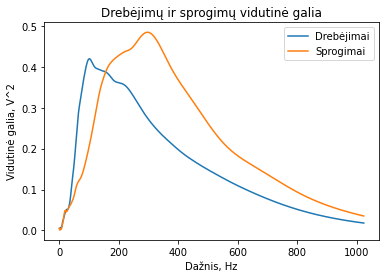

In [280]:
# Pagal duomenų lenteles brėžiu drebėjimų ir sprogimų vidutinė galios pokyčio besikeičiant dažniui grafiką.

plt.plot(dreb_df.mean(axis = 0), label = "Drebėjimai")
plt.plot(sprog_df.mean(axis = 0), label = "Sprogimai")
plt.legend()
plt.xlabel("Dažnis, Hz")
plt.ylabel("Vidutinė galia, V^2")
plt.title("Drebėjimų ir sprogimų vidutinė galia")
plt.show

In [ ]:
# REZULTATAI: Iš TF grafikų apytiksliai galima nustatyti įvykių pradžios ir pabaigos laikus - drebėjimai truko maždaug nuo 0.5 s iki 0.8 s,
# o sprogimai nuo 0.7 s iki 0.9 s. Labiausiai vyraujantis dažnis fiksuojamas žemės drebėjimų metu yra apie 90 Hz, o sprogimų metu apie 
# 100 Hz. Lyginant drebėjimus ir sprogimus galima pastebėti, kad didžiausia vidutinė galia fiksuojama ties 100 Hz drebėjimų atveju ir
# ties 380 Hz sprogimų atveju. Didėjant dažniui drebėjimų ir sprogimų vidutinė galia tolygiai mažėja.

---
>> **4. UŽDUOTIS**
>>
>> Užfiksuotas žiurkės smegenų atsakas į 200 kartų pakartotą ritmišką šviesos signalą.
>>
>> Vizualizuokite duomenis ir nustatykite:
>> - Vidutinį atsaką
>> - Atsako parametrus (trukmė, dažnį)
>> - Laiką ir dažnį maksimalaus atsako (kaip jis kinta pritaikius skirtingas bazinės linijos korekcijas)
>>
>> Duomenys: ecog.csv Diskretizacijos dažnis 1000 Hz
>>

---

In [12]:
# 4 task
#
# The response of the rat brain to a rhythmic light signal repeated 200 times is recorded
#
# 1. Visualise the data and determine: response parameters (duration, frequency), time and frequency of the maximum response 
#    (how it varies with different baseline corrections)

In [288]:
# Priskiriu diskretizacijos dažnio vertę, nuskaitau duomenis

sample_rate = 1000
ekogas = pd.read_csv("ecog.csv")
print(ekogas.head())

   index  time  condition  epoch     signal
0      0 -1000          1      1 -11.539653
1      1 -1000          1      1  -9.631297
2      2  -999          1      1  -9.473975
3      3  -999          1      1  -9.162348
4      4  -998          1      1  -6.822595


In [289]:
# Naudojant for ciklą išskiriu iš duomenų epochas ir joms priklausančius signalus, sukuriu transponuotą duomenų lentelę.

sarasas = []
for x in range (1,199):
    listas = ekogas[ekogas["epoch"]==x]
    if listas.empty:
        pass # ištrina vertes, kurios buvo tuščios
    else: # kitu atveju
        sarasas.append(listas["signal"]) # papildo sąrašą signalo vertėm
signalai_epochos = np.array(sarasas) # sąrašas paverčiamas į masyvą
signalai_epochos_df = pd.DataFrame(signalai_epochos).transpose() # masyvas verčiamas i duomenų lentelę ir transponuojamas

6145


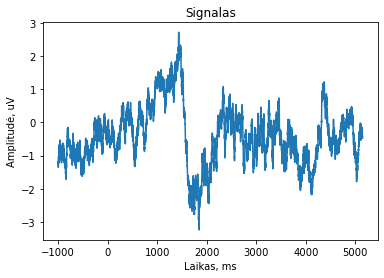

In [304]:
# Randami eilučių vidurkiai, sukuriamas laiko masyvas ir pagal eilučių vidurkius brėžiamas signalo grafikas 

signalai_epochos_df["mean"] = signalai_epochos_df.mean(axis = 1)
t = np.linspace(-1000, 5145, 6145)
print(len(signalai_epochos_df["mean"]))
plt.plot(t, signalai_epochos_df["mean"])
plt.title("Signalas")
plt.xlabel("Laikas, ms")
plt.ylabel("Amplitudė, uV")
plt.show()

In [291]:
# Bendra viso laiko Furje transformacija

def fft(x):
    x = np.array(x, dtypes=float)
    N = x.shape[0]
    if N % 2 > 0:
        raise
    elif N <= 32:
        return dft(x)
    else:
        x_even = fft(x[::2])
        x_odd = fft(x[1::2])
        terms = np.exp(-2j * np.pi * np.arrange(N) / N)
        return np.concat([x_even + terms[:int(N/2)]*x_odd,
                          x_even + terms[int(N/2):]*x_odd])

(0.0, 200.0)

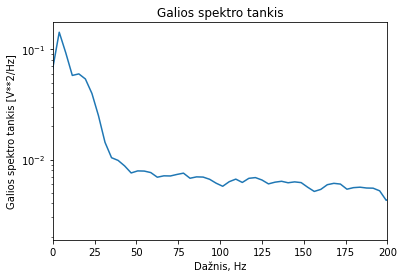

In [295]:
# Naudojant Welch metodą brėžiamas norint sukurti signalo galios spektrą, kuris apibendrina kaip galia priklauso nuo dažnio

f, Pxx_spec = signal.welch(signalai_epochos_df["mean"], sample_rate, 'hann',  scaling='density')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('Dažnis, Hz')
plt.ylabel('Galios spektro tankis [V**2/Hz]')
plt.title('Galios spektro tankis');
plt.xlim(0,200)

(0.0, 200.0)

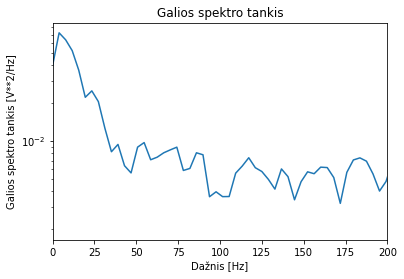

In [ ]:
f, Pxx_spec = signal.welch(signalai_epochos_df["mean"][0:1000], sample_rate, 'hann',  scaling='density')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('Dažnis [Hz]')
plt.ylabel('Galios spektro tankis [V**2/Hz]')
plt.title('Galios spektro tankis');
plt.xlim(0,200)

(0.0, 200.0)

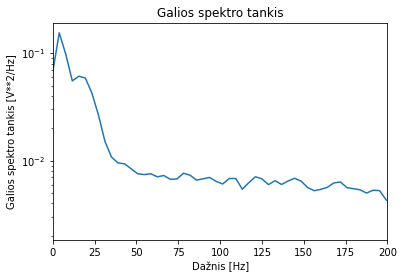

In [ ]:
f, Pxx_spec = signal.welch(signalai_epochos_df["mean"][1000::], sample_rate, 'hann',  scaling='density')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('Dažnis [Hz]')
plt.ylabel('Galios spektro tankis [V**2/Hz]')
plt.title('Galios spektro tankis');
plt.xlim(0,200)

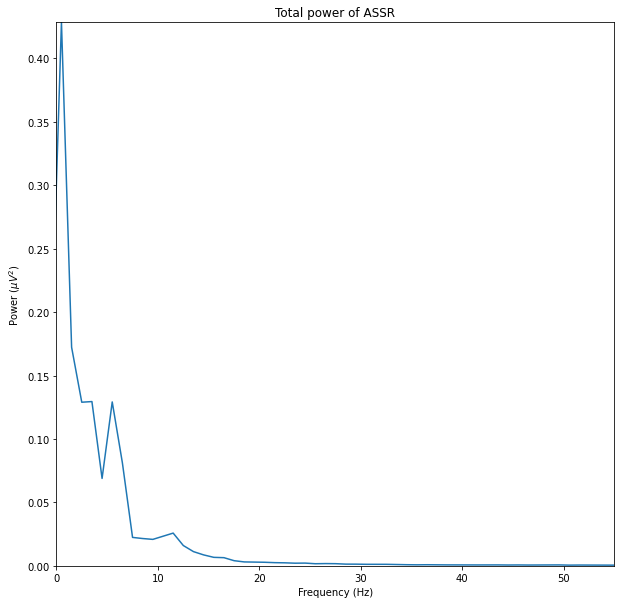

In [305]:
# Naudojant FFT algoritmą gaunu dažninę charakteristika

A = []
plt.figure(figsize=(10,10))
for trial in signalai_epochos_df:
    A.append(np.abs(np.fft.fft(signalai_epochos_df[trial], sample_rate) / (len(signalai_epochos_df[trial])/2.0))
)
A = np.mean(A, axis=0)
freq = np.linspace(sample_rate//2*-1, sample_rate//2, len(A))
response = fftshift(A)**2
plt.plot(freq, response)
plt.axis([0, 55, 0, max(response)])
plt.title("Total power of ASSR")
plt.ylabel("Power ($\mu V^2$)");
plt.xlabel("Frequency (Hz)");

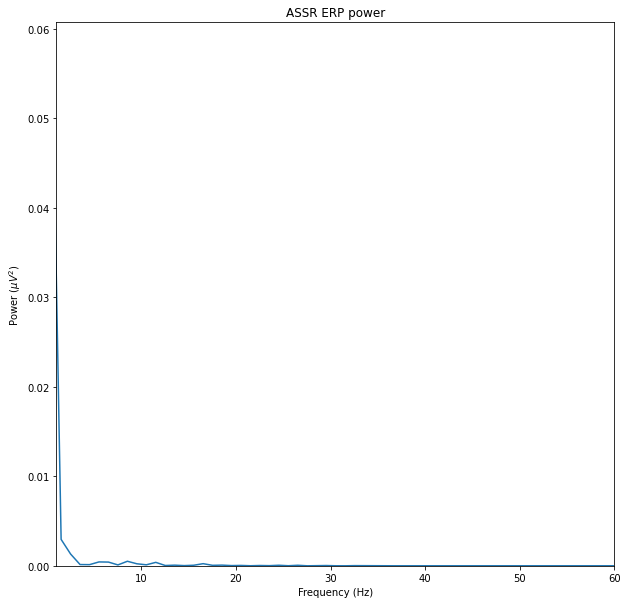

In [311]:
erp = signalai_epochos_df.mean(axis=1)
plt.figure(figsize=(10,10))
A = np.fft.fft(erp, sample_rate) / (len(erp)/2.0)
freq = np.linspace(sample_rate//2*-1, sample_rate//2, len(A))
response = np.abs(fftshift(A))**2
plt.plot(freq, response)
plt.axis([1, 60, 0, max(response)])
plt.title("ASSR ERP power")
plt.xlabel("Frequency (Hz)");
plt.ylabel("Power ($\mu V^2$)");